In [37]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import librosa.display
from IPython.display import Audio

In [53]:
# import os
# import shutil

# # Set the source folder path
# source_folder = r"C:\Users\christ\Downloads\Amirthavarshini Sentimental analysis\Crema - D data\AudioWAV"

# # Get a list of all files in the source folder
# files = os.listdir(source_folder)

# # Iterate through the files and organize them into class folders
# for filename in files:
#     # Check if the file name contains "ang"
#     if "ANG" in filename:
#         class_name = "ANGER"  # The class name for files with "ang" in their name
#     elif "DIS" in filename:
#         class_name = "DISGUST"
#     elif "FEA" in filename:
#         class_name = "FEAR"
#     elif "SAD" in filename:
#         class_name = "SAD"
#     elif "NEU" in filename:
#         class_name = "NEUTRAL"
#     else:
#         class_name = "HAPPY"

#     # Create a folder for the class if it doesn't exist
#     class_folder = os.path.join(source_folder, class_name)
#     if not os.path.exists(class_folder):

#         os.mkdir(class_folder)

#     # Move the file to the class folder
#     src_path = os.path.join(source_folder, filename)
#     dest_path = os.path.join(class_folder, filename)
#     shutil.move(src_path, dest_path)

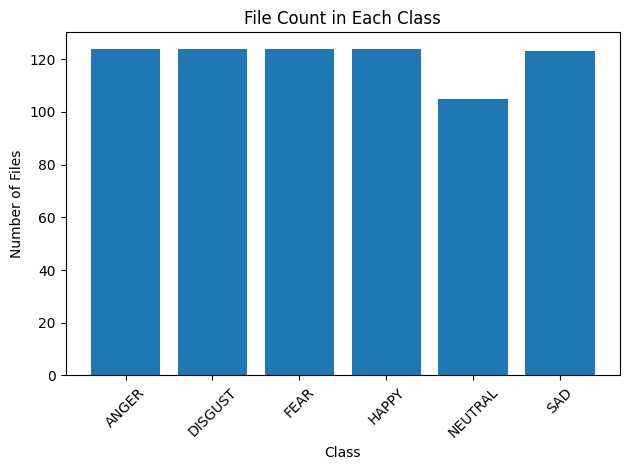

In [39]:
import os
import matplotlib.pyplot as plt

# Set the source folder path
source_folder = r"C:\Users\christ\Downloads\Amirthavarshini Sentimental analysis\Crema - D data\AudioWAV"

# Get a list of all subfolders in the source folder
subfolders = [f.path for f in os.scandir(source_folder) if f.is_dir()]

# Initialize lists to store folder names and file counts
folder_names = []
file_counts = []

# Count the number of files in each subfolder
for folder in subfolders:
    folder_name = os.path.basename(folder)
    folder_names.append(folder_name)
    file_counts.append(len(os.listdir(folder)))

# Create a bar plot
plt.bar(folder_names, file_counts)
plt.xlabel("Class")
plt.ylabel("Number of Files")
plt.title("File Count in Each Class")
plt.xticks(rotation=45)  # Rotate class labels for better visibility
plt.tight_layout()
plt.show()

In [40]:
import os
import librosa
import random
from IPython.display import Audio

# Set the source folder path
source_folder = r"C:\Users\christ\Downloads\Amirthavarshini Sentimental analysis\Crema - D data\AudioWAV"

# Function to recursively traverse folders and select one audio file from each folder
def traverse_folders(folder):
    selected_audio_files = []
    for root, dirs, files in os.walk(folder):
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            audio_files = [f for f in os.listdir(dir_path) if f.endswith(".wav")]
            if audio_files:
                random_audio_file = random.choice(audio_files)
                audio_file_path = os.path.join(dir_path, random_audio_file)
                label = dir
                selected_audio_files.append((audio_file_path, label))
    return selected_audio_files

# Start the traversal
selected_audio_files = traverse_folders(source_folder)

# Play one random audio file from each folder using IPython's Audio widget
for audio_file_path, label in selected_audio_files:
    print(f"Playing audio from folder: {label}")
    audio, sr = librosa.load(audio_file_path)
    display(Audio(data=audio, rate=sr))


Playing audio from folder: ANGER


Playing audio from folder: DISGUST


Playing audio from folder: FEAR


Playing audio from folder: HAPPY


Playing audio from folder: NEUTRAL


Playing audio from folder: SAD


In [44]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Function to create spectrogram for audio
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

We can also plot waveplots and spectograms for audio signals
##### Waveplots - Waveplots let us know the loudness of the audio at a given time.
##### Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [47]:
def traverse_folders(folder):
    selected_audio_files = []
    for root, dirs, files in os.walk(folder):
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            audio_files = [f for f in os.listdir(dir_path) if f.endswith(".wav")]
            if audio_files:
                random_audio_file = random.choice(audio_files)
                audio_file_path = os.path.join(dir_path, random_audio_file)
                label = dir
                selected_audio_files.append((audio_file_path, label))
    return selected_audio_files

Playing and visualizing audio from folder: ANGER


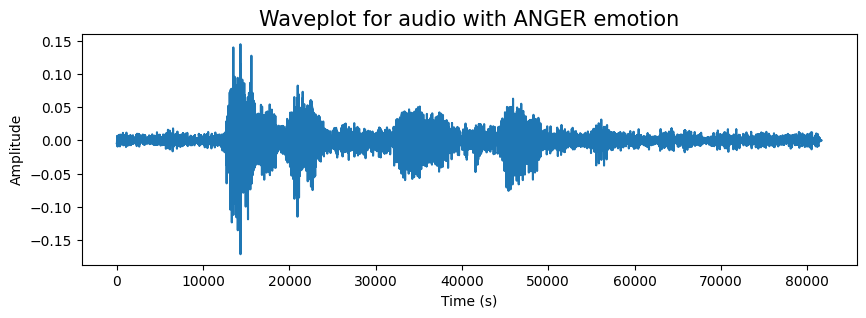

Playing and visualizing audio from folder: DISGUST


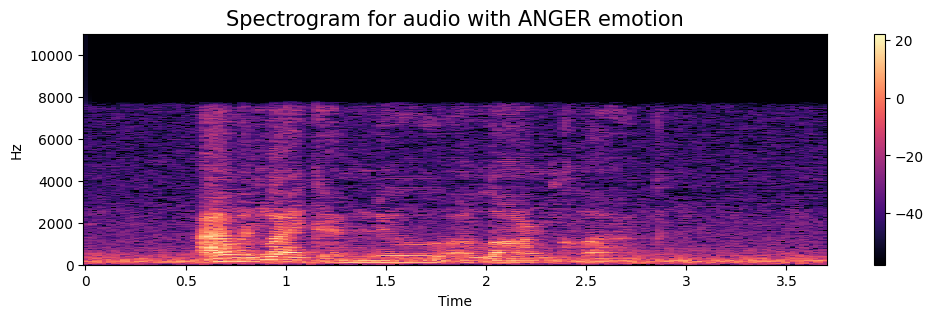

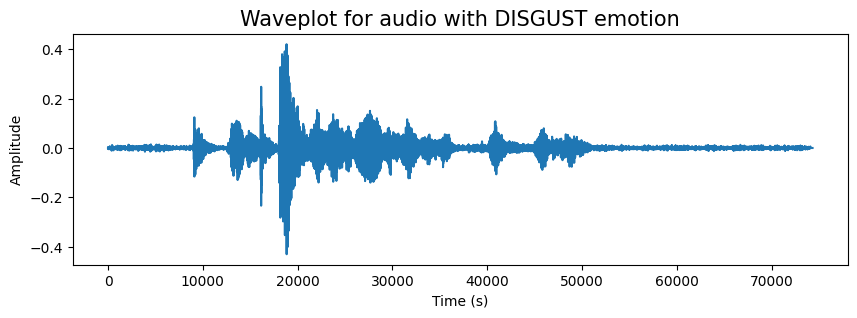

Playing and visualizing audio from folder: FEAR


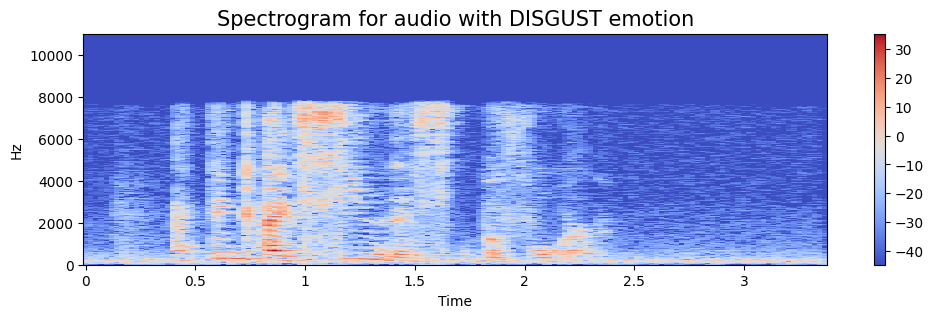

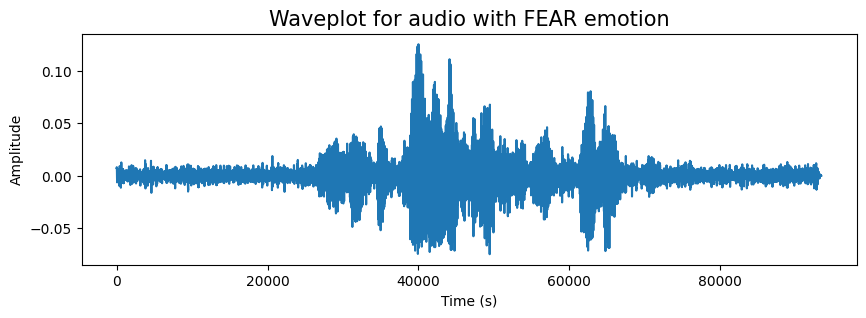

Playing and visualizing audio from folder: HAPPY


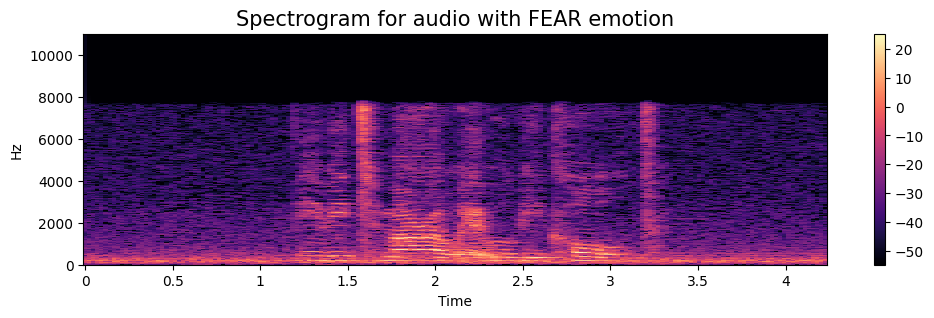

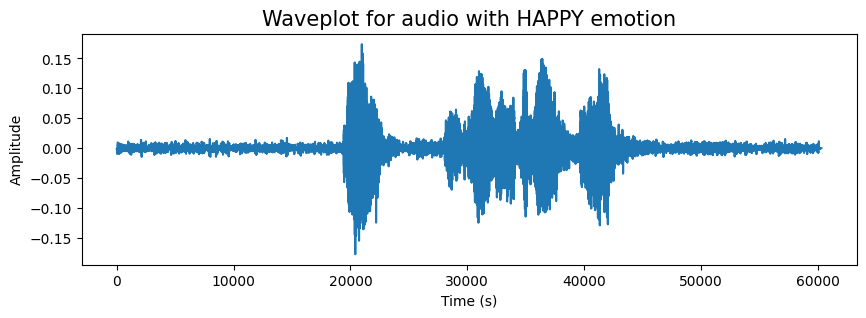

Playing and visualizing audio from folder: NEUTRAL


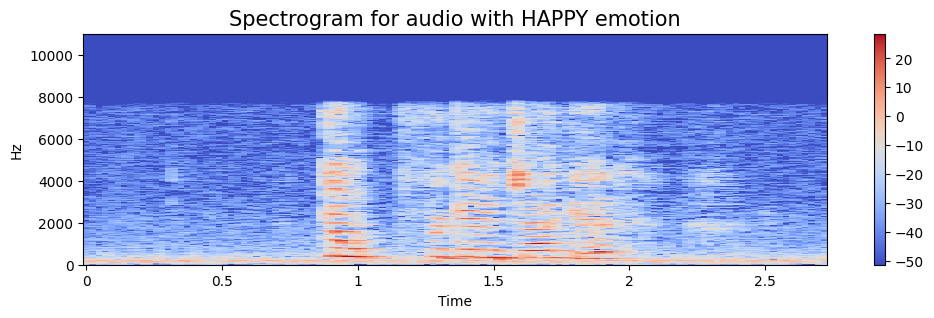

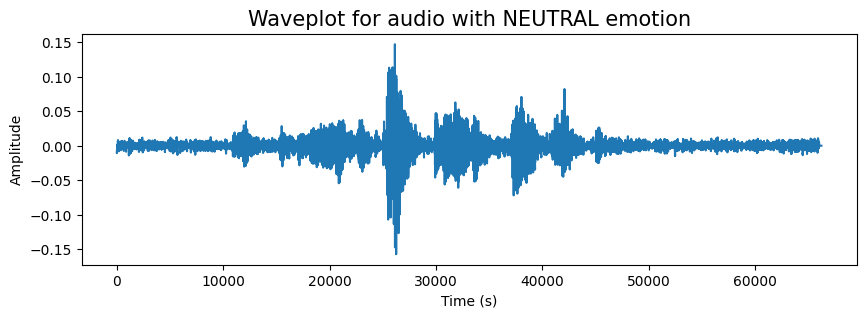

Playing and visualizing audio from folder: SAD


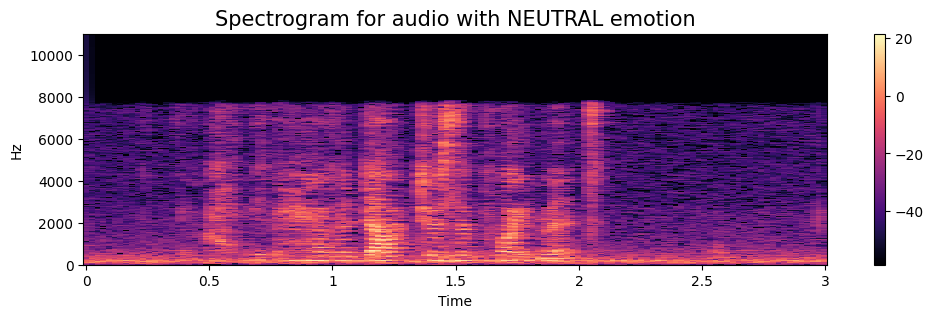

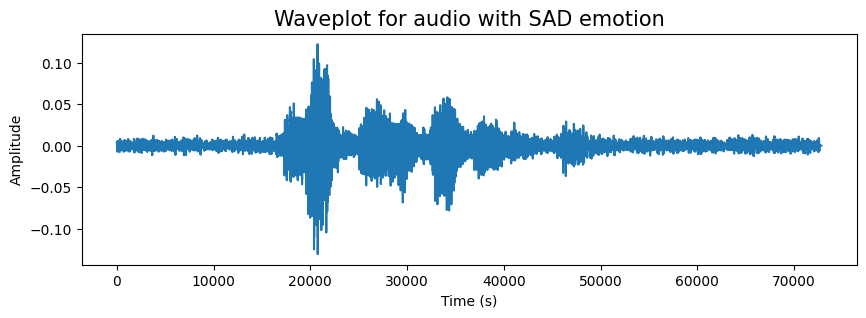

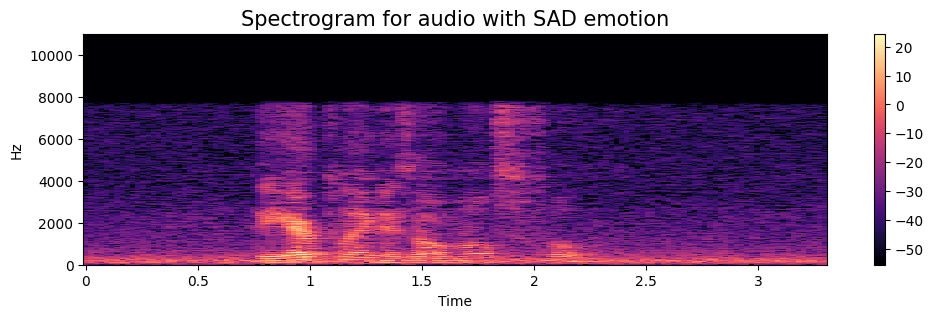

In [56]:
# Play one random audio file from each folder and display waveplots and spectrograms
for audio_file_path, label in selected_audio_files:
    print(f"Playing and visualizing audio from folder: {label}")
    create_waveplot(audio, sr, label)
    create_spectrogram(audio, sr, label)
    audio, sr = librosa.load(audio_file_path)
    display(Audio(data=audio, rate=sr))

ImportError: Could not find the DLL(s) 'msvcp140_1.dll'. TensorFlow requires that these DLLs be installed in a directory that is named in your %PATH% environment variable. You may install these DLLs by downloading "Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019" for your platform from this URL: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads